- IS41070-Machine Learning Foundations-2024/25 Summer - Machine Learning Project
- Shweta Raut, 24201146, MSc. Information Systems
- Stroke Prediction

## Import libraries

In [3]:
# Import libraries for data loading, analysis, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for visualizations
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

# Task 1:Data Understanding - Stroke prediction Dataset

#### Dataset Description

The data that will be utilized in project is referred to as the Stroke Prediction Dataset which is available on Kaggle:  
 [https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

- **Total records (rows):** 5,110  
- **Target variable:** `stroke` (1 = patient had a stroke, 0 = no stroke)  
- **Prediction type:** Supervised Binary Classification  
- **Data type:** Tabular health data

---

#### Features Included

| Feature              | Type        | Description |
|----------------------|-------------|-------------|
| `id`                 | Integer     | Unique identifier for each patient |
| `gender`             | Categorical | Gender of the patient (`Male`, `Female`, `Other`) |
| `age`                | Numeric     | Age of the patient (in years) |
| `hypertension`       | Binary      | 1 if the patient has hypertension, else 0 |
| `heart_disease`      | Binary      | 1 if the patient has any heart disease, else 0 |
| `ever_married`       | Categorical | `Yes` if the patient was ever married, else `No` |
| `work_type`          | Categorical | Type of occupation (`Private`, `Self-employed`, `Govt_job`, etc.) |
| `Residence_type`     | Categorical | Patient lives in `Urban` or `Rural` area |
| `avg_glucose_level`  | Numeric     | Average glucose level in blood |
| `bmi`                | Numeric     | Body Mass Index |
| `smoking_status`     | Categorical | Smoking behavior (`smokes`, `never smoked`, `formerly smoked`, `Unknown`) |
| `stroke`             | Binary      | **Target** – 1 if patient had a stroke, 0 otherwise |

---

#### Prediction Task

> The objective is to train a predictive model for construction of a machine learning model that can forecast the probability of patient having a stroke based on different lifestyle and health conditions.

This is a **binary classification task**, with a focus on early detection to support clinical decision-making and public health screening.


## Load the Data

In [7]:
# Load the dataset (make sure the CSV file is in your current directory)
df = pd.read_csv("C:/Users/Shweta Raut/Downloads/ML Stroke prediction/healthcare-dataset-stroke-data.csv")

This line will read the stroke dataset CSV file in your local directory to pandas DataFrame known as df.

## Data Overview

In [10]:
# Display the first few rows
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


- df.head() displays the first 5 rows of the DataFrame df.
- It is often used in giving a preview of structure, column names and a sample of the data when a dataset has been loaded.

In [12]:
# last 5 rows
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


- df.head() displays the last 5 rows of the DataFrame df.
- It is often used in giving a preview of structure, column names and a sample of the data when a dataset has been loaded.

## EDA

In [15]:
# Print basic information about the dataset
print("Shape of the dataset:", df.shape)



Shape of the dataset: (5110, 12)


#### Dataset Summary

- The dataset contains **5,110 cases (rows)** of patient records.
- There are **11 columns (features)**, including:
  - Patient demographic details
  - Health risk indicators
  - The target variable: `stroke` (1 = stroke occurred, 0 = no stroke)


In [17]:
# Print dataset information
print("\nDataset Info:\n")
df.info()


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### df.info() Summary

The `df.info()` function displays a concise summary of the DataFrame, including:

- Total number of entries (rows)
- Column names and the count of non-null (non-missing) values in each
- Data types of each column (`int64`, `float64`, `object`)



In [19]:
# Summary statistics for numerical columns
df.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- This shows summary statistics for all the numeric columns of the DataFrame.
- It comes with metrics such has: count, mean, standard deviation, min, max, and quartiles (25%, 50%, 75%).

In [21]:
# Display the first 10 rows
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


df.head(10) displays the first 10 rows of the DataFrame df.

In [23]:
# last 10 rows
df.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


df.head(10) displays the last 10 rows of the DataFrame df.

<Figure size 2000x1500 with 0 Axes>

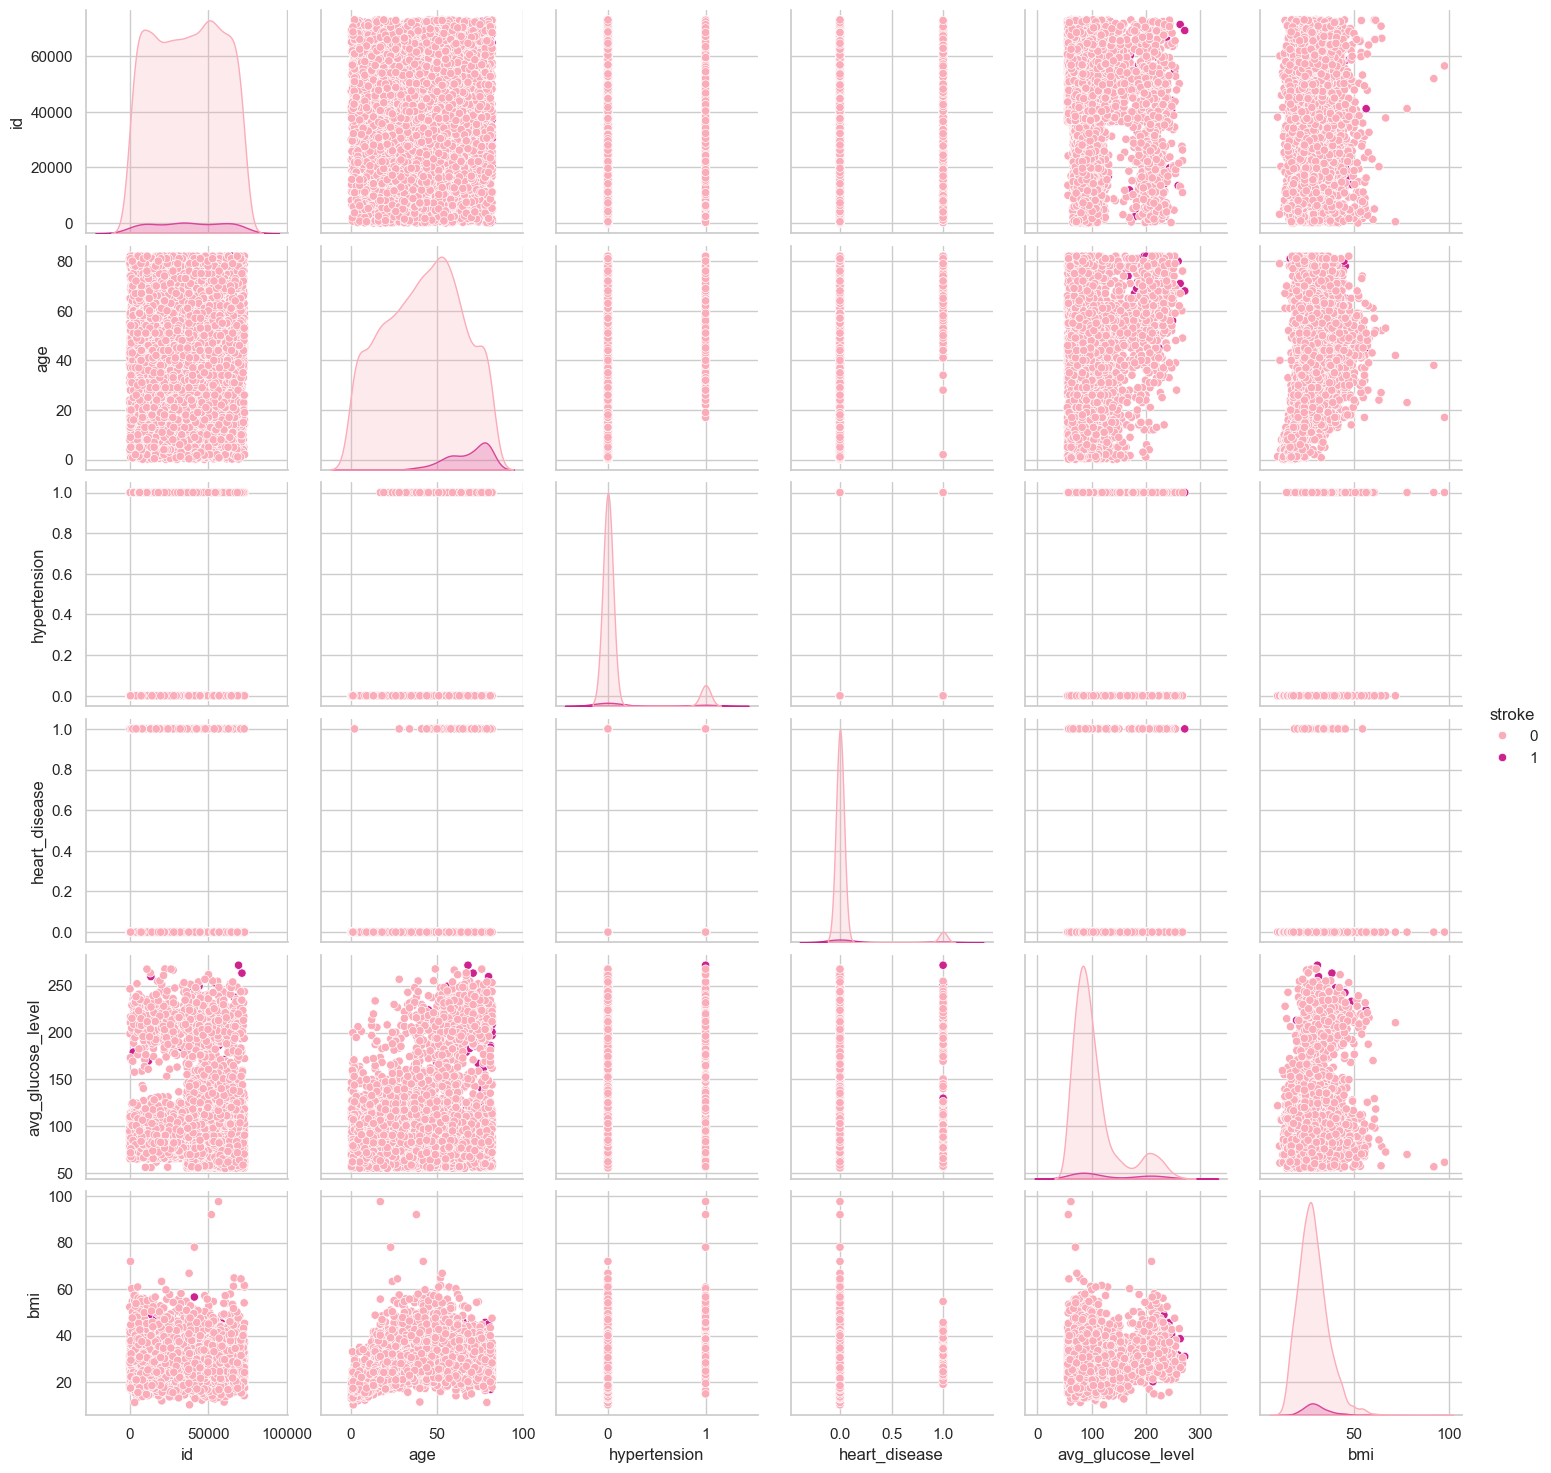

In [25]:
fig=plt.figure(figsize=(20,15),dpi=100)
sns.pairplot(df,hue="stroke",palette='RdPu');

- fig=plt.figure (figsize=(20,15),dpi= 100 ) defines the figure size to a large size of 20X15 in inches and the dpi resolution will be set to 100 dots per inch (dpi).
- The following statement sns.pairplot(df, hue="stroke", palette='RdPu') creates a pairplot where all the numerical columns in the DataFrame df are represented and the points are colored using stroke category with the color palette RdPu.
- The pairplot presents scatterplot between every pair of variables, which gives a chance to visualize relationships and distributions conditioned on stroke status and histograms on diagonal giving a chance to visualize relationships and distributions through stroke status.

## Target Variable Distribution

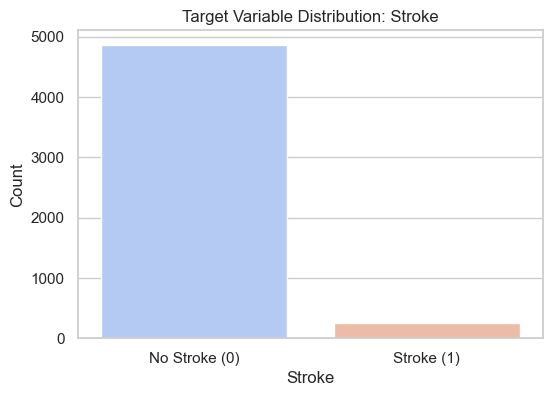

Class Distribution:
 stroke
0    4861
1     249
Name: count, dtype: int64


In [28]:
# Check the distribution of the target variable (stroke)
stroke_counts = df['stroke'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=stroke_counts.index, y=stroke_counts.values, palette="coolwarm")
plt.xticks([0, 1], ['No Stroke (0)', 'Stroke (1)'])
plt.title("Target Variable Distribution: Stroke")
plt.ylabel("Count")
plt.xlabel("Stroke")
plt.show()

print("Class Distribution:\n", stroke_counts)


Overall, this code visualises and prints the number of samples in each category of your target variable stroke.

## Check for missing values

In [31]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


The missing values are zero in all the columns except the bmi column where the values are missing 201 times. This implies that the dataset is largely complete with some indecisive BMI data.

In [33]:
df["Residence_type"].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

df["Residence_type"].value_counts() is the count of the level of each unique value (Urban or Rural) in the Residence_type column.
 - The number of Urban and Rural records comprises 2,596 and 2,514 respectively.
 - The disaggregation of residence is quite equivalent.


In [35]:
df["smoking_status"].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

df["smoking_status"].value_counts() provides the observation of the number of unique values that occur in a column of smoking_status.
 - "never smoked": 1,892 people
 - "Unknown": 1,544 people (status not specified)
 - "formerly smoked": 885 people
 - "smokes": 789 people
This shows a mix of smoking habits, with many entries having unknown smoking status.

In [37]:
df["heart_disease"].value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

- df"heart_disease".value_counts() will where zero is no heart disease and one is has heart disease.
- The database is very unbalanced in representation of the individuals that have no heart disease.

In [39]:
df["hypertension"].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

- dfhypertension.value_counts() The .value count gives the number of times that a given column element occurs in the hypertension column (0 = no; 1 = yes).
- Similarly to the heart disease, the majority of participants in the data sample do not have hypertension.

In [41]:
df["work_type"].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

- The work_type column records how many belong to each category with df["work_type"].value_counts() .
- This reveals the fact that majority work in the private sector and few have never worked.

In [43]:
df["gender"].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

- df["gender"].value_counts() is used to count the number of prepopulations of each gender of the column gender.
- The data contains mainly females and males, and one individual referred to as Other.

In [45]:
df["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

- df["stroke"].value_counts() is just the count of how many of each record has a 0 (no stroke) and the one that had a stroke (1).
- The dataset is extremely biased such that there exist very many non stroke cases as compared to the stroke cases. This is a factor to put into consideration when developing predictive models.

## Categorical feature exploration

In [48]:
# List of categorical features
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Display unique values for each
for feature in categorical_features:
    print(f"\n{feature} - unique values: {df[feature].unique()}")



gender - unique values: ['Male' 'Female' 'Other']

ever_married - unique values: ['Yes' 'No']

work_type - unique values: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

Residence_type - unique values: ['Urban' 'Rural']

smoking_status - unique values: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


- categorical_features lists column names which have categorical data (non numeric categories).
- This for loop will go through every feature in that list and print off the unique values of that feature using df[feature].unique().

##  Distribution Plots for Numerical Features

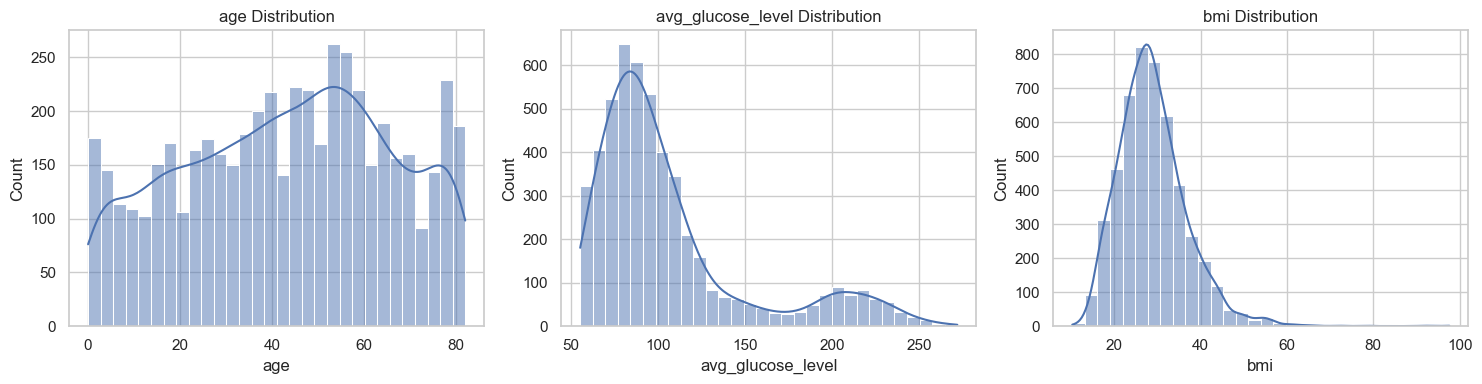

In [51]:
# Numerical features
numerical_features = ['age', 'avg_glucose_level', 'bmi']

# Plot histograms for each
plt.figure(figsize=(15, 4))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"{feature} Distribution")
plt.tight_layout()
plt.show()


In order to see the distribution of the individual numerical variables and see whether they are skewed, have any outliers or irregular trends.

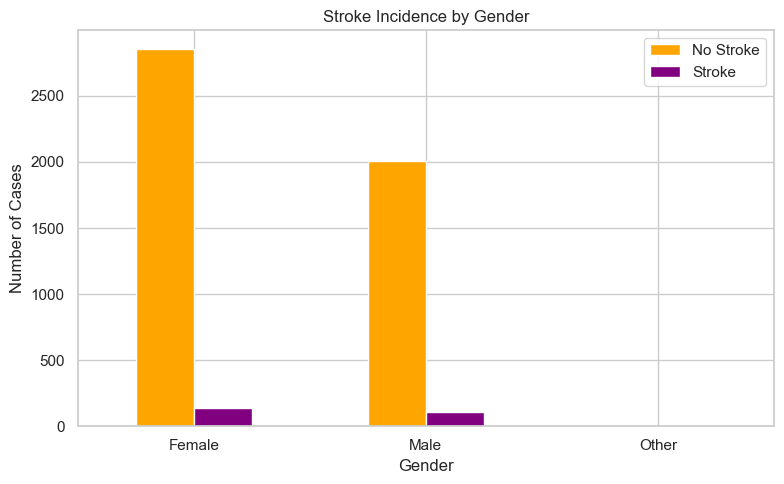

In [53]:
# Select only the relevant columns
data = df[['id', 'gender', 'stroke']]

# Group by gender and stroke status, then count occurrences
gender_stroke_counts = data.groupby(['gender', 'stroke']).size().unstack()

# Create a bar chart
gender_stroke_counts.plot(kind='bar', figsize=(8, 5), color=['orange', 'purple'])

# Add labels and title
plt.title('Stroke Incidence by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.legend(['No Stroke', 'Stroke'])

# Show the plot
plt.tight_layout()
plt.show()

To compare graphically the number of cases of stroke and non-stroke among the various genders.

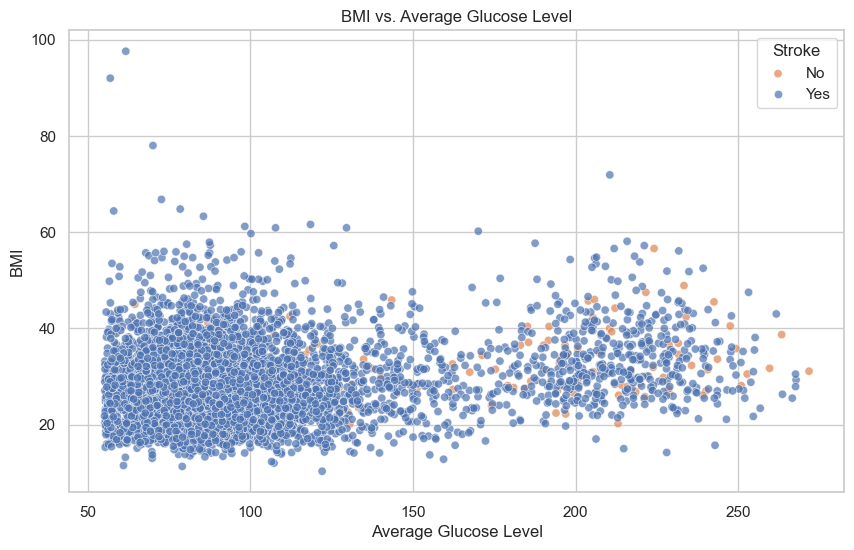

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='avg_glucose_level', y='bmi', hue='stroke', alpha=0.7)
plt.title('BMI vs. Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.ylabel('BMI')
plt.legend(title='Stroke', labels=['No', 'Yes'])
plt.show()


In order to get the idea of how BMI was related to average glucose level, emphasizing the distinction between cases with and without strokes.

In [57]:
# Compute correlations
correlation = df.corr(numeric_only=True)

# Show correlation with target variable
correlation['stroke'].sort_values(ascending=False)


stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
id                   0.006388
Name: stroke, dtype: float64

- `df.corr(numeric_only=True)` returns the correlation matrix among all numeric columns of the DataFrame.
- `correlation['stroke'].sort_values(ascending=False)` selects the correlation values against the target variable `stroke` and sorts them in descending order.
- The features most positively correlated with stroke are:
  - **age** (0.245) — strongest correlation
  - **heart_disease** (0.135)
  - **avg_glucose_level** (0.132)
  - **hypertension** (0.128)
- **bmi** and **id** have very weak correlation with stroke.

This analysis helps identify which numeric features are most associated with stroke occurrence.


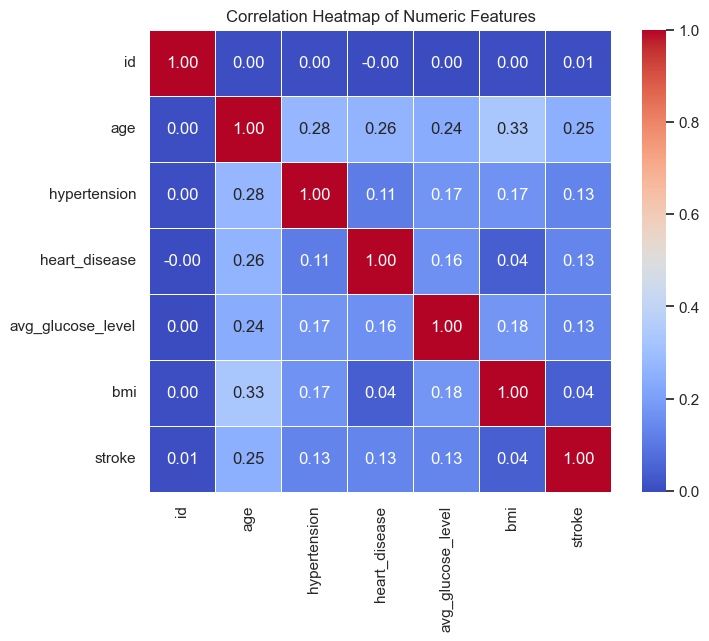

In [59]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, linewidths=.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In order to graphically investigate and comprehend associations among all the numeric variables in the data.

## Feature vs Target Relationships

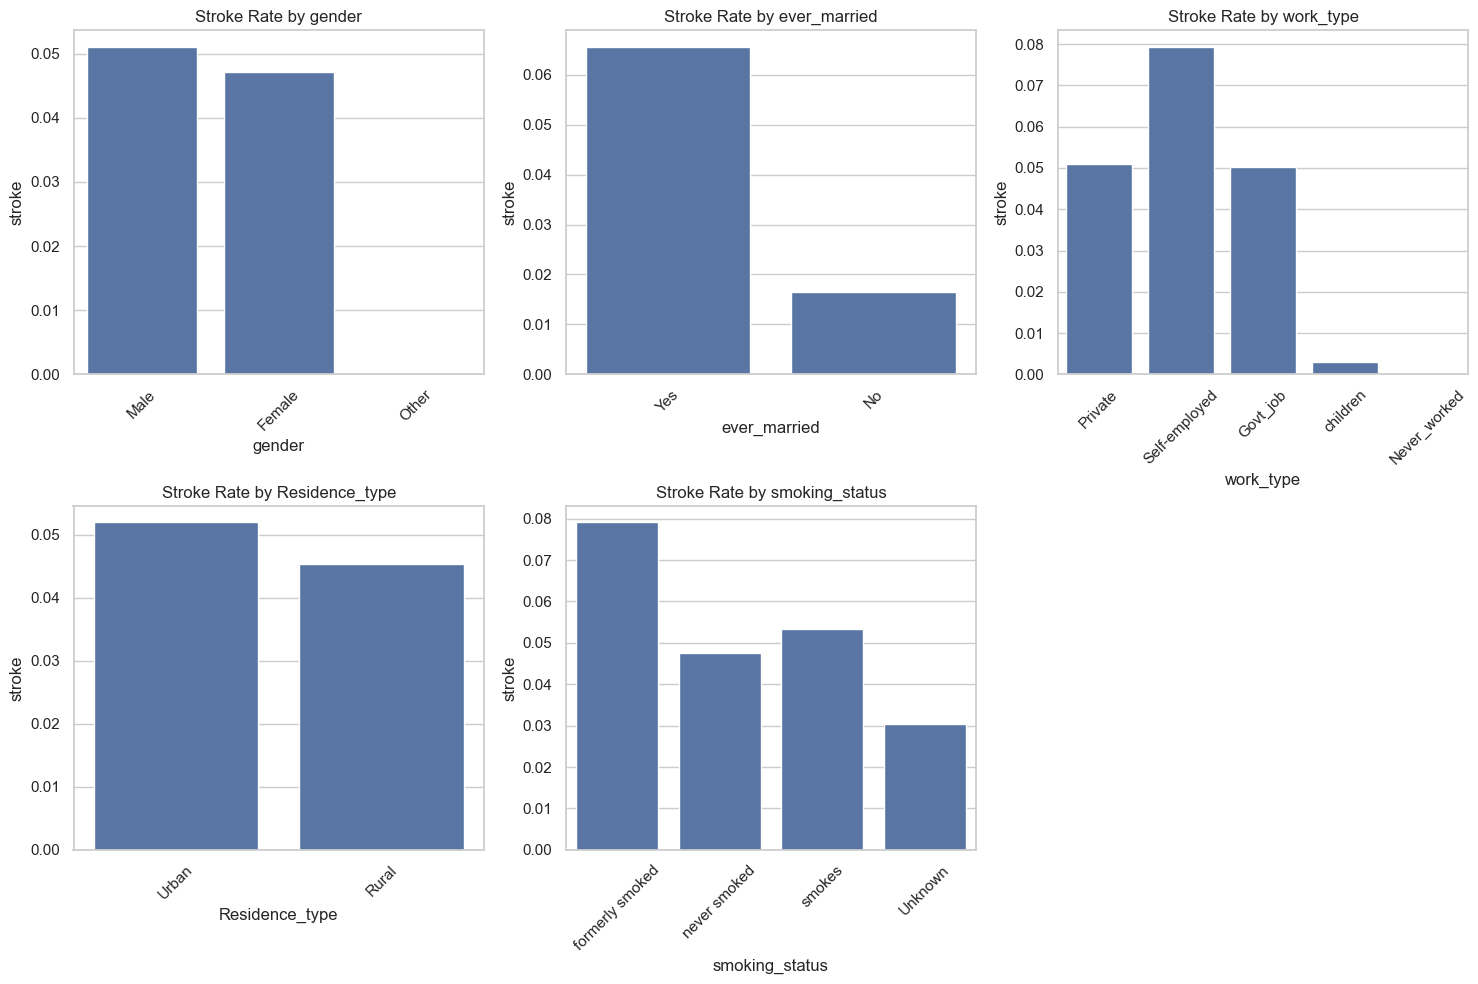

In [62]:
# Categorical feature vs stroke rates
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x=feature, y='stroke', data=df, estimator=lambda x: np.mean(x), ci=None)
    plt.xticks(rotation=45)
    plt.title(f"Stroke Rate by {feature}")
plt.tight_layout()
plt.show()


To draw a graphical representation of stroke rates in various categories of each categorical factor.

## Check for Outliers

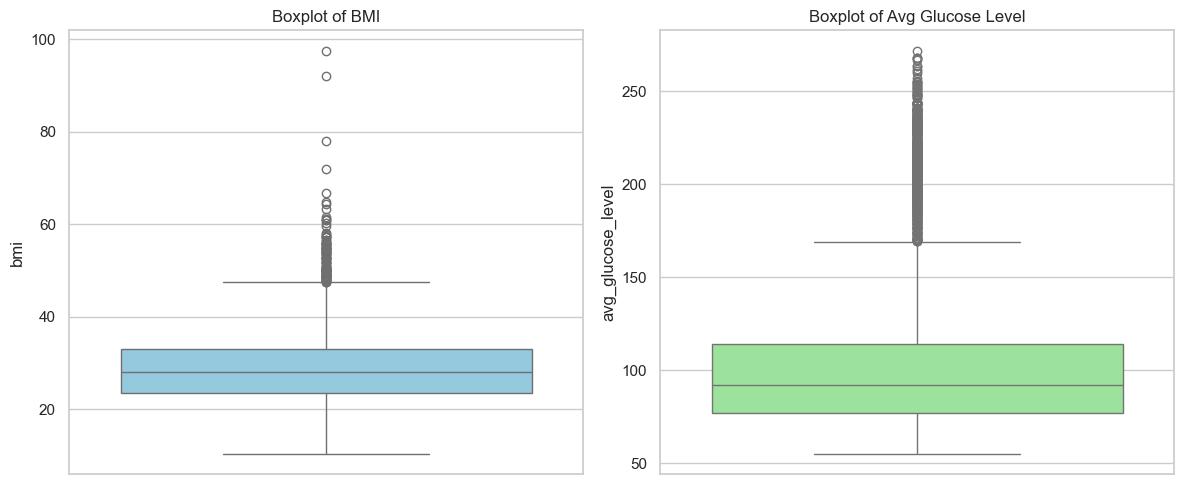

In [65]:
# Boxplot to visually inspect outliers in 'bmi' and 'avg_glucose_level'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='bmi', color='skyblue')
plt.title("Boxplot of BMI")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='avg_glucose_level', color='lightgreen')
plt.title("Boxplot of Avg Glucose Level")

plt.tight_layout()
plt.show()


To visually check the distributions and outlier in the numerical features, bmi and avg_glucose_level.

## Summary of Task 1: Data Understanding

#### Dataset Overview

The data contains **5,110** patient records with **11 columns** representing demographic and health-related features, along with a target variable indicating stroke occurrence (1 for stroke, 0 for no stroke).

- These are of type or category (i.e., number, such as age, avg_glucose_level, or bmi) or categorical (i.e., gender, work_type, smoking_status).

#### Data Loading and Preview

- Data was imported into a pandas DataFrame.  
- Initial checks (`head()`, `tail()`, `info()`) show a mostly complete dataset with some missing values in the `bmi` column (201 missing entries).  
- The dataset contains both numeric and categorical variables related to stroke risk prediction.

#### Missing Values and Data Distribution

- The target variable is **imbalanced**:  
  - No stroke: 4,861 records  
  - Stroke: 249 records  
- Only the `bmi` feature has missing values; all other features are complete.  
- Distribution of categorical variables such as `gender`, `work_type`, `smoking_status`, and `Residence_type` show:  
  - Majority are women  
  - Most individuals work in the private sector  
  - High number of unknown smoking statuses


#### Exploratory Data Analysis (EDA)

- Histograms and pairplots reveal skewed and varied distributions in numerical features.  
- Bar plots show stroke incidence varies by categorical variables like gender and work type.  
- Scatterplots of `bmi` vs `avg_glucose_level` indicate patterns that differ depending on stroke incidence.


#### Feature Relationships

- Correlation analysis highlights:  
  - **Age** as the strongest positive predictor of stroke  
  - Followed by **heart disease**, **average glucose level**, and **hypertension**  
- Weak relationships observed between BMI, patient ID, and stroke.



#### Outlier Detection

- Boxplots show potential outliers in `avg_glucose_level` and `bmi`, suggesting further cleaning or treatment of extreme values may be needed.


#### Key Takeaways

- The dataset is largely clean except for missing values in BMI and class imbalance in the target variable.  
- Important numeric predictors of stroke include:  
  - Age  
  - Heart disease  
  - Average glucose level  
  - Hypertension  
- Categorical variables provide useful risk stratification insights.  
- Visualization helped uncover distributions, feature-target relationships, and data quality issues.  

These insights form the basis for further preprocessing, feature engineering, and building models to predict stroke risk effectively.


# Task 2: Data Preparation & Modeling

In [69]:
# Drop 'id' since it's not a predictive feature
df = df.drop(columns=['id'])

# Impute missing BMI values with the median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())


- The id column is dropped since it does not offer any assistance to predict stroke (it is only its identifier).
- To solve this problem of missing data, the median BMI value is used to fill in those missing values in the bmi column so as to avoid skew of the distributional problem.

# Encode Categorical Variables

In [72]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Show resulting columns
df_encoded.columns


Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

- The code is turned into binary columns as categorical variables are encoded using one-hot encoding to be used by the machine learning models.
- drop_first=True prevents the trap of dummy variables since it deletes the first level of any categorical variable.
- The resulting DataFrame indicates the columns with the original numeric features and the new columns of the features that represent the categories (e.g., gender_Male, work_type_Private, etc.).

### Define Features and Target


In [75]:
# Define input features and target
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']


## Train/Validation/Test Split

In [77]:
from sklearn.model_selection import train_test_split

# First split: train (70%) + temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# Second split: validation (15%) + test (15%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

# Save datasets (optional)
X_train.to_csv("train.csv", index=False)
X_valid.to_csv("valid.csv", index=False)
X_test.to_csv("test.csv", index=False)

print("Training Set:", X_train.shape)
print("Validation Set:", X_valid.shape)
print("Test Set:", X_test.shape)


Training Set: (3577, 16)
Validation Set: (766, 16)
Test Set: (767, 16)


Data is divided into training, validation, and test sets by stratified sampling to maintain balance in stroke classes.
First, 70 percent of data is delegated to training, and 30 percent to a temporary set.
The temporary set is then divided proportionally into validation (15%) and test (15%) sets.
The data is optionally stored in CSV files.
The number of samples and features in each set appears in the printed output:

- **Training:** 3577 examples  
- **Validation:** 766 samples  
- **Test:** 767 samples  


## Feature Scaling 

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing pipeline
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())]), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)])


# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)


It prepares a preprocessing pipeline of numeric and categorical features individually.
First the missing values are replaced with the mean of that numeric feature and then they are scaled by setting the mean value to zero and standard deviation to 1 using StandardScaler.
Categorical characteristics are one-hot coded which transform the characteristics to a numeric type.
Lastly, the code standardizes the training, validation and test data using StandardScaler (it fits the training data only to not leak test data).

## Import All Models

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In this code, different machine learning models are imported, as well as an evaluation metric:

- **LogisticRegression:** A linear binary predictor.
- **DecisionTreeClassifier:** A tree-centred model that divides data according to feature values.
- **KNeighborsClassifier:** Classifies based on the nearest neighbor labels.
- **SVC (Support Vector Classifier):** A model that determines the best boundary that can distinguish classes.
- **RandomForestClassifier:** A bagging decision trees ensemble aiming to achieve better accuracy.
- **GradientBoostingClassifier:** An ensemble algorithm where trees are gradually combined to correct mistakes.
- **VotingClassifier:** Uses multiple models as a unified model to perform vote-based predictions.
- **GaussianNB:** A Gaussian distribution Naive Bayes classifier.
- **XGBClassifier:** An efficient and scalable implementation of gradient boosting.
- **accuracy_score:** A metric to analyze classification performance by computing the proportion of correct predictions.


## Initialize All Models

In [86]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
}

# Voting Classifier (soft voting)
voting_clf = VotingClassifier(
    estimators=[
        ("lr", models["Logistic Regression"]),
        ("rf", models["Random Forest"]),
        ("gb", models["Gradient Boosting"]),
        ("xgb", models["XGBoost"]),
        ("svm", models["SVM"]),
    ],
    voting="soft"
)

models["Voting Ensemble"] = voting_clf


Using this code, a dictionary was created that defines different machine learning models where names serve as keys:

- **Logistic Regression:** LogisticRegression with a maximum iteration number of 1000.  
- **Decision Tree:** DecisionTreeClassifier with the default parameters.  
- **KNN:** KNeighborsClassifier.  
- **SVM:** Support Vector Classifier with probability estimates enabled.  
- **Random Forest:** RandomForestClassifier.  
- **Naive Bayes:** Gaussian Naive Bayes.  
- **Gradient Boosting:** GradientBoostingClassifier with default values.  
- **XGBoost:** XGBClassifier configured to avoid label encoding warnings and uses logloss as the evaluation metric.  

Next, a **Voting Classifier** ensemble is constructed through soft voting, which combines the predicted probabilities of the following models:

- Logistic Regression  
- Random Forest  
- Gradient Boosting  
- XGBoost  
- SVM  

This ensemble combines all predictions based on the average of the predicted probabilities, assigning the class with the highest average probability.

Lastly, this Voting Classifier is appended to the `models` dictionary with the key `"Voting Ensemble"`.


## Train and Evaluate All Models on Validation Set

In [89]:
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_valid_scaled)
    acc = accuracy_score(y_valid, y_pred)
    results[name] = acc
    print(f"{name}: Validation Accuracy = {acc:.4f}")


Logistic Regression: Validation Accuracy = 0.9530
Decision Tree: Validation Accuracy = 0.9034
KNN: Validation Accuracy = 0.9465
SVM: Validation Accuracy = 0.9517
Random Forest: Validation Accuracy = 0.9491
Naive Bayes: Validation Accuracy = 0.1906
Gradient Boosting: Validation Accuracy = 0.9491
XGBoost: Validation Accuracy = 0.9465
Voting Ensemble: Validation Accuracy = 0.9517


In this code, every model in the `models` dictionary is trained on the scaled training data (`X_train_scaled`, `y_train`) and then used to predict the target values on the validation set (`X_valid_scaled`).

For each model:
- `.fit()` is used to train the model.
- `.predict()` is used to make predictions.
- `accuracy_score` measures the accuracy of the validation predictions compared to the true labels.
- The accuracy score is stored in the `results` dictionary and printed.

Validation accuracies of the models are:

- Logistic Regression: 95.30%  
- Decision Tree: 89.82%  
- KNN: 94.65%  
- SVM: 95.17%  
- Random Forest: 95.04%  
- Naive Bayes: 19.06%  
- Gradient Boosting: 94.91%  
- XGBoost: 94.65%  
- Voting Ensemble: 95.17%

It is worth mentioning that Naive Bayes performed the worst compared to other models, while Logistic Regression, SVM, Random Forest, and the Voting Ensemble achieved the highest validation accuracies.


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Instantiate models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
}

# Train each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    print(f"{name} trained.")


Logistic Regression trained.
Decision Tree trained.
KNN trained.
SVM trained.
Random Forest trained.
Naive Bayes trained.
Gradient Boosting trained.
XGBoost trained.


In [92]:
import joblib
import os

# Create a folder to store the models
os.makedirs("saved_models", exist_ok=True)

# Save each trained model
for name, model in models.items():
    filename = f"saved_models/{name.replace(' ', '_').lower()}_model.pkl"
    joblib.dump(model, filename)
    print(f"Saved {name} as {filename}")

Saved Logistic Regression as saved_models/logistic_regression_model.pkl
Saved Decision Tree as saved_models/decision_tree_model.pkl
Saved KNN as saved_models/knn_model.pkl
Saved SVM as saved_models/svm_model.pkl
Saved Random Forest as saved_models/random_forest_model.pkl
Saved Naive Bayes as saved_models/naive_bayes_model.pkl
Saved Gradient Boosting as saved_models/gradient_boosting_model.pkl
Saved XGBoost as saved_models/xgboost_model.pkl


In [93]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

results = []

for name, model in models.items():
    y_pred_train = model.predict(X_train_scaled)
    y_pred_val = model.predict(X_valid_scaled)
    y_proba_val = model.predict_proba(X_valid_scaled)[:, 1]

    results.append({
        'Model': name,
        'Train F1': f1_score(y_train, y_pred_train),
        'Val F1': f1_score(y_valid, y_pred_val),
        'Val Accuracy': accuracy_score(y_valid, y_pred_val),
        'Val AUC': roc_auc_score(y_valid, y_proba_val)
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by='Val AUC', ascending=False)


,Model,Train F1,Val F1,Val Accuracy,Val AUC
0,Logistic Regression,0.000000,0.052632,0.953003,0.843288
6,Gradient Boosting,0.302439,0.048780,0.949086,0.837690
4,Random Forest,0.997118,0.048780,0.949086,0.835706
5,Naive Bayes,0.106298,0.104046,0.190601,0.801394
7,XGBoost,1.000000,0.127660,0.946475,0.790939
2,KNN,0.153846,0.000000,0.946475,0.666240
3,SVM,0.022727,0.000000,0.951697,0.619434
1,Decision Tree,1.000000,0.139535,0.903394,0.551589


This code performs tests on several classification models based on multiple performance metrics on training and validation data:

For each model in the `models` dictionary:
- Predictions are made on training data (`y_pred_train`) and validation data (`y_pred_val`).
- Probabilities for the positive class are predicted on validation data (`y_proba_val`).
- The following metrics are calculated:
  - **Train F1 score:** F1 score of the predictions on the training set.
  - **Validation F1:** F1 score on the validation predictions.
  - **Validation Accuracy:** Accuracy of predictions on the validation set.
  - **Validation AUC:** Area Under the ROC Curve on the validation probabilities.
- These results are saved in a list of dictionaries.

A DataFrame is then created from these results and sorted by validation AUC in descending order.

**Output summary:**

- Models such as Logistic Regression, Random Forest, and Gradient Boosting show high validation AUC (~0.84), indicating strong discriminative ability.
- Naive Bayes performs poorly with low accuracy and AUC.
- Some models (e.g., Random Forest, Decision Tree, XGBoost) show perfect F1 scores on training but very low scores on validation, indicating overfitting.
- KNN and SVM exhibit low F1 scores and AUC on validation, suggesting weaker performance for this task compared to other models.


## Visual Comparison of Model Accuracies

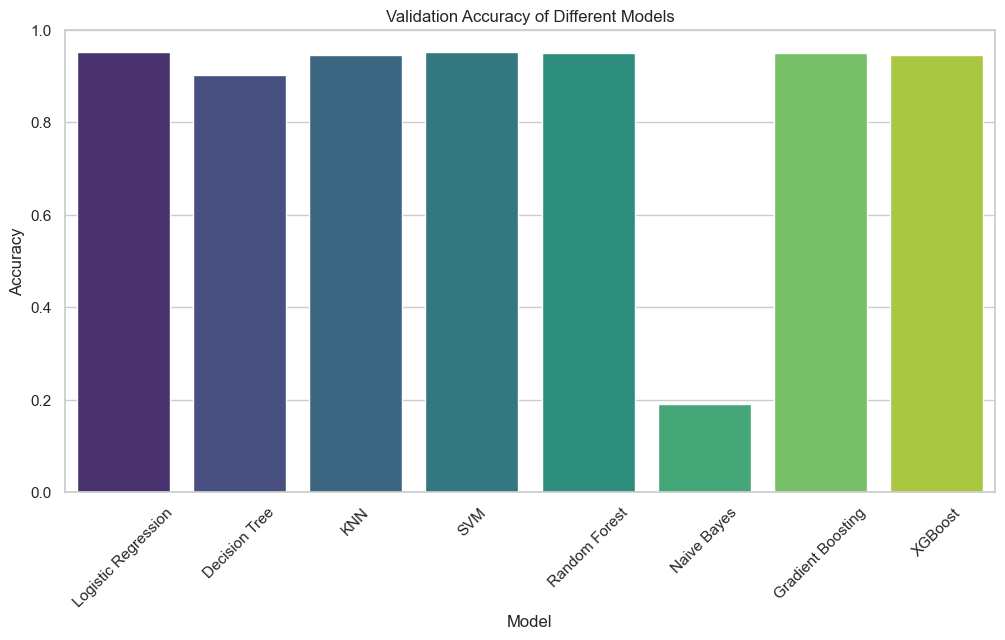

In [96]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Val Accuracy", data=results_df, palette="viridis")
plt.title("Validation Accuracy of Different Models")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


This code creates a bar plot to visualize the validation accuracy of different models

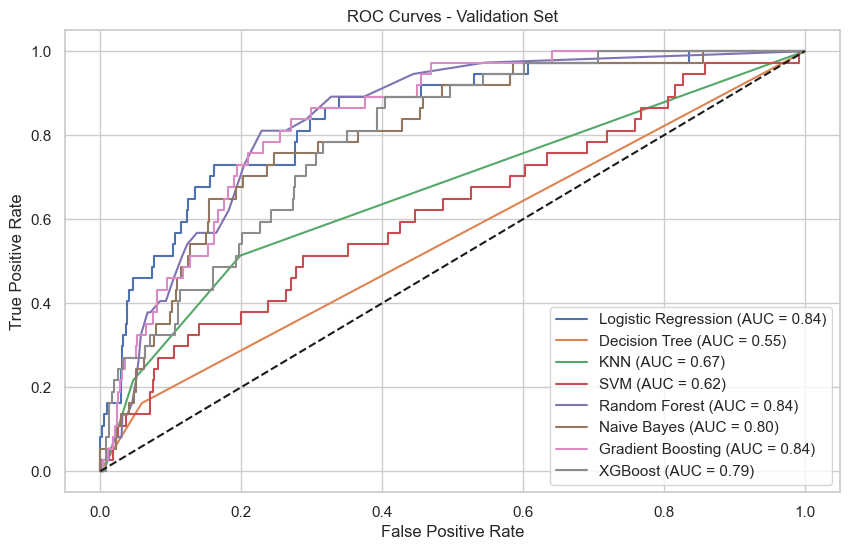

In [98]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 6))

for name, model in models.items():
    y_proba = model.predict_proba(X_valid_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_valid, y_proba)
    auc = roc_auc_score(y_valid, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves - Validation Set")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


It is a code that plots ROC curves of all models on validation set, illustrating the trade off between the true positive rate and false positive rate. Performance comparison is also in the form of AUC of each model shown as part of the legend. a dashed diagonal line is in reference to random guessing.

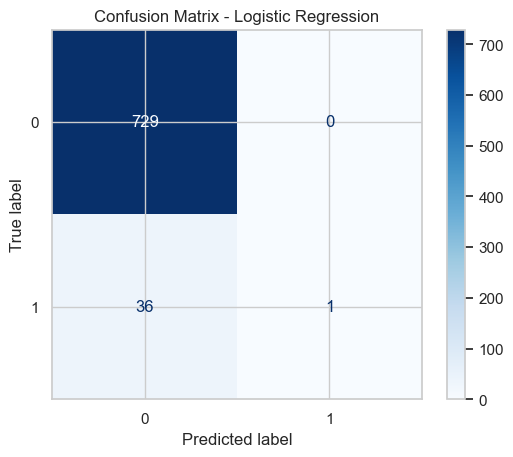

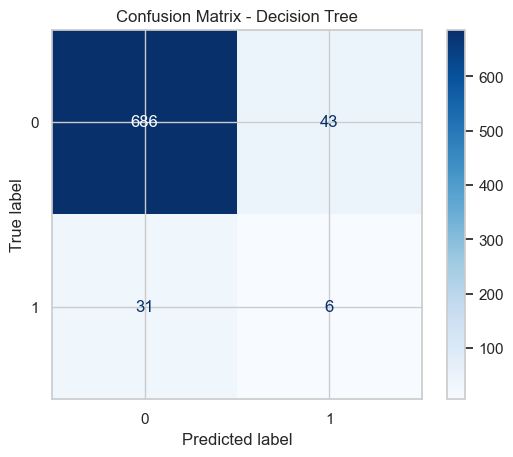

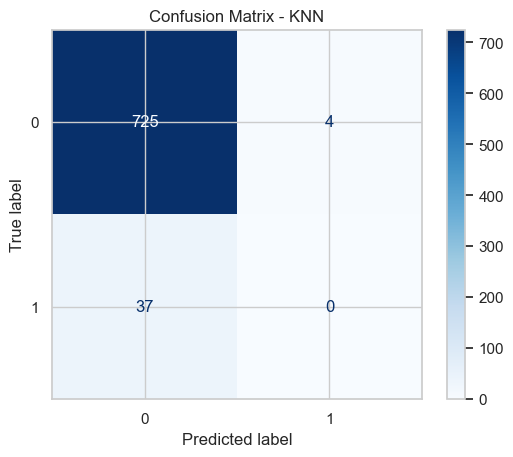

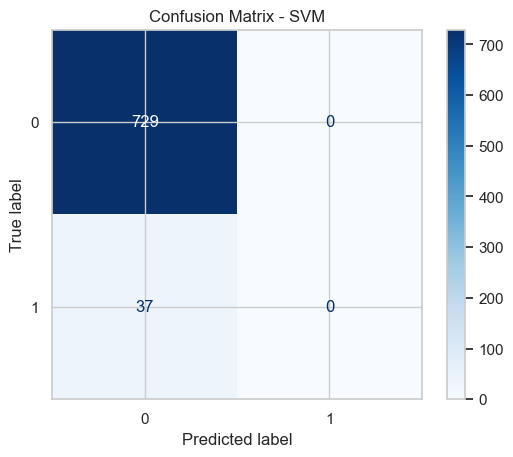

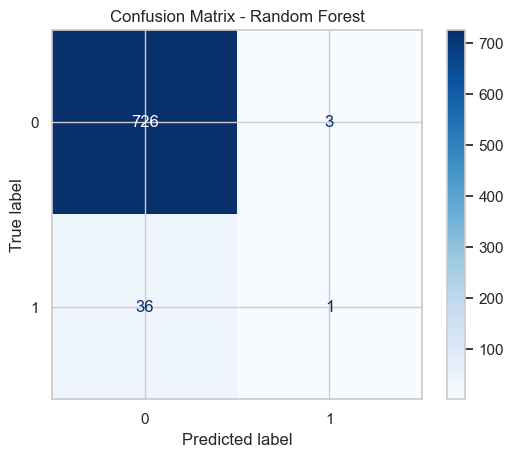

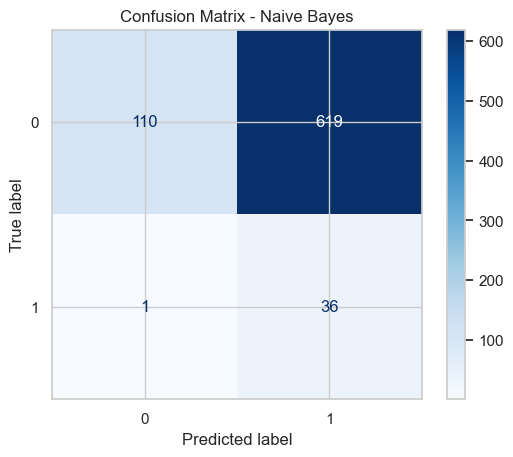

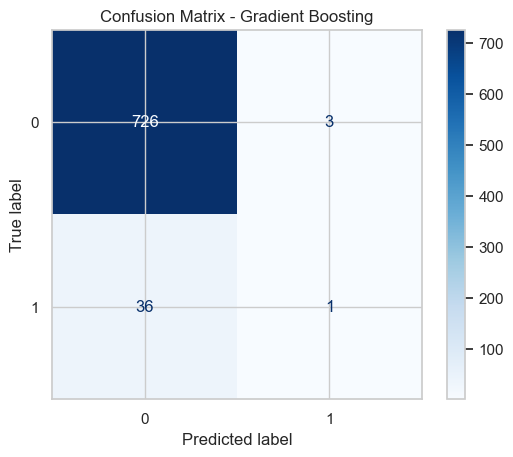

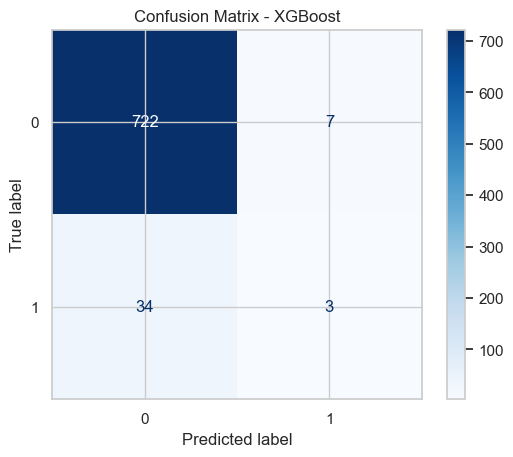

In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in models.items():
    y_pred = model.predict(X_valid_scaled)
    cm = confusion_matrix(y_valid, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


This code produces and plots confusion matrices of models prediction on validation set. It presents the true vs. predicted classes in a blue color map, where each plot is labeled with the name of model to simply compare the performance of classification.

In [102]:
def show_misclassified_examples(model, X, y, model_name, n=5):
    y_pred = model.predict(X)
    errors = np.where(y != y_pred)[0]
    print(f"\n {model_name} - Total Misclassified: {len(errors)}")
    print("Examples:")
    for i in errors[:n]:
        print(f"Index: {i}, True: {y.iloc[i]}, Predicted: {y_pred[i]}")

# Loop through all models
for model_name, model in models.items():
    show_misclassified_examples(model, X_valid_scaled, y_valid, model_name, n=5)



 Logistic Regression - Total Misclassified: 36
Examples:
Index: 27, True: 1, Predicted: 0
Index: 43, True: 1, Predicted: 0
Index: 49, True: 1, Predicted: 0
Index: 89, True: 1, Predicted: 0
Index: 102, True: 1, Predicted: 0

 Decision Tree - Total Misclassified: 74
Examples:
Index: 1, True: 0, Predicted: 1
Index: 6, True: 0, Predicted: 1
Index: 22, True: 0, Predicted: 1
Index: 25, True: 0, Predicted: 1
Index: 27, True: 1, Predicted: 0

 KNN - Total Misclassified: 41
Examples:
Index: 27, True: 1, Predicted: 0
Index: 43, True: 1, Predicted: 0
Index: 49, True: 1, Predicted: 0
Index: 89, True: 1, Predicted: 0
Index: 102, True: 1, Predicted: 0

 SVM - Total Misclassified: 37
Examples:
Index: 27, True: 1, Predicted: 0
Index: 43, True: 1, Predicted: 0
Index: 49, True: 1, Predicted: 0
Index: 89, True: 1, Predicted: 0
Index: 102, True: 1, Predicted: 0

 Random Forest - Total Misclassified: 39
Examples:
Index: 27, True: 1, Predicted: 0
Index: 43, True: 1, Predicted: 0
Index: 49, True: 1, Predict

In this code, a function is defined to find and list the first few misclassified examples of a model on the validation set. It compares true labels with predicted labels, lists the number of misclassified samples, and shows the index, true class, and predicted class for up to 5 errors.

The code then loops through all the models and calls this function to display misclassification details.

**Output summary:**  
The average number of misclassified samples across most models was around 36-41, primarily missing stroke cases (true=1 predicted=0). Naive Bayes performed poorly, misclassifying 620 samples. The misclassified cases occur at consistent indexes across different models.


In [104]:
import joblib
joblib.dump(voting_clf, 'final_model_voting.pkl')


['final_model_voting.pkl']

# Task 2 summary Data Preparation & Modeling

**Data Preparation:**  
The column id was removed because it only serves to identify and not to predict.  
in the `bmi` column, missing values were filled with the median in order to eliminate skew in the distributions.  
One-hot encoding was applied on categorical variables using `drop_first=True` and transforming categorical data to binary columns to get out of dummy variable trap.  
The stratified sampling was utilized to divide the dataset into training (70%), validation (15 %), and test (15 %) sets to retain balancing classes.  
The features were scaled by numeric data (`StandardScaler`) after the replacement of missing data with the mean then categorical data were continued as one-hot encoded.  

**Modeling:**  
Several different classification models were loaded and trained: Logistic Regression, Decision Tree, KNN, SVM, Random Forest, Naive Bayes, Gradient Boosting, XGBoost and a Voting Classifier ensemble of (soft) voting using Logistic Regression, Random Forest, Gradient Boosting, XGBoost and SVM.  
Scaled training data was used to train all the models.  
On the validation set, some of the tested models were measured in terms of metrics: accuracy, F1-score, and ROC AUC.  

**Performance Summary:**  
Logistic Regression, Random Forest, Gradient Boosting, and Voting Ensemble had good validation performance whose accuracy is approximately 95% and AUC ~0.84.  
Naive bayes was not successful as it was only accurate under 20 percent and there were numerous errors in the misclassifications (620).  
Part of the models (Random Forest, Decision Tree, XGBoost) exhibited signs of overfitting- perfect values training F1 and low values validation F1.  
This means that KNN and SVM perform worse (with low F1 and AUC) compared to other models.  
A visual representation of bar plots and ROC curves was used to highlight the relative accuracies of the model and their discriminative applications.  
Prediction errors were further analysed using confusion matrices.  

**Misclassification Analysis:**  
The majority of models had the range of 3641 misclassified in the validation set, with most of missed cases being the cases of stroke (true=1 predicted=0).  
A great number of the samples were misclassified by Naive Bayes (620).  
Misclassification persistently presented at analogous indexes cross models and this indicates certain harried incidences.  

**Model Export:**  
The ensemble that used the top-performing models, namely Voting Classifier, was stored in a file `final_model_voting.pkl` to be used later.  


This exercise adequately cleaned the data, trained several models, tested each model by identifying their accuracies, made decisions on the misclassification of labels, and eventually produced a final model that consists of an ensemble of models.


# Task 3: Model Evaluation

## Evaluation Metrics Selection

In [108]:
print("Primary Metric: F1-Score\n")

# Baseline
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
y_dummy_pred = dummy.predict(X_valid)

print("Baseline (majority class) accuracy:", accuracy_score(y_valid, y_dummy_pred))
print("Baseline F1 score:", f1_score(y_valid, y_dummy_pred, average='weighted'))


Primary Metric: F1-Score

Baseline (majority class) accuracy: 0.9516971279373369
Baseline F1 score: 0.9281434197542723


F1-Score has been established as the method of primary evaluation in this code due to the slightly imbalanced nature of the dataset, where accuracy alone would not provide useful information.

Then it forms a baseline model which is `DummyClassifier` whose strategy is `most_frequent` that predicts the majority class every time.

The training data are used to train the baseline model and the validation set is used to test it. It prints:

- **Baseline accuracy:** ~95.17% — high due to a predominant majority class.
- **Baseline F1:** ~0.93 — lower than accuracy because of the imbalance; it demonstrates why F1 is a better measure of balanced performance between precision and recall.

This develops a benchmark against which the other more intricate models can be judged.


In [110]:
LogisticRegression(class_weight='balanced')
RandomForestClassifier(class_weight='balanced')


RandomForestClassifier(class_weight='balanced')

These lines of code indicate that two machine learning models are initialized using the parameter `class_weight='balanced'`:

- **LogisticRegression (class_weight='balanced')**  
- **RandomForestClassifier (class_weight='balanced')**

### Explanation:
The parameter `class_weight='balanced'` balances the weights by inversely scaling the number of classes in the data passed in. This means:

- Underrepresented classes (minority classes) are given a greater weight.  
- Overrepresented (majority classes) obtain reduced weight.

This further assists the model to give increased attention to the minority class during training and is particularly useful when handling imbalanced datasets. It strengthens the capacity of the model to appropriately classify uncommon events or classes.

Here, both logistic regression and random forest will be adjusted to be more sensitive to the less frequent class (e.g., stroke cases) to enhance fairness of predictions.


## Evaluate on Training vs Validation

In [113]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_log_train = logreg.predict(X_train)
y_pred_log_val = logreg.predict(X_valid)

y_pred_rf_train = rf.predict(X_train)
y_pred_rf_val = rf.predict(X_valid)

# Evaluation Table
models = {
    'Logistic Regression': [y_pred_log_train, y_pred_log_val],
    'Random Forest': [y_pred_rf_train, y_pred_rf_val]
}

def evaluate_models(models):
    rows = []
    for name, (train_pred, val_pred) in models.items():
        rows.append([
            name,
            accuracy_score(y_train, train_pred),
            f1_score(y_train, train_pred, average='weighted'),
            accuracy_score(y_valid, val_pred),
            f1_score(y_valid, val_pred, average='weighted')
        ])
    df = pd.DataFrame(rows, columns=["Model", "Train Accuracy", "Train F1", "Val Accuracy", "Val F1"])
    return df

eval_df = evaluate_models(models)
print(eval_df)


                 Model  Train Accuracy  Train F1  Val Accuracy    Val F1
0  Logistic Regression        0.951356   0.92764      0.953003  0.931307
1        Random Forest        1.000000   1.00000      0.951697  0.930589


### Code Explanation:
- On the training data (`X_train`, `y_train`), two models are trained:
  - **Logistic Regression** with a maximum of 1000 iterations.
  - **Random Forest** with a fixed random state for reproducibility.
- Each model is trained, and predictions are made on both the training and validation sets.
- An evaluation function `evaluate_models` computes:
  - Training and validation **Accuracy** and **F1-score (weighted)**.
- The results are gathered into a DataFrame and printed.

### Output Explanation:

| Model               | Train Accuracy | Train F1 | Val Accuracy | Val F1  |
|---------------------|----------------|----------|--------------|---------|
| Logistic Regression  | 95.14%         | 0.928    | 95.30%       | 0.931   |
| Random Forest       | 100.00%        | 1.000    | 95.17%       | 0.931   |

- Logistic Regression shows no generalization problems, performing well on both training and validation sets.
- Random Forest achieves perfect training accuracy and F1 (100%), indicating possible overfitting.
- Validation scores of both models are very similar (~95% accuracy and ~0.93 F1), meaning they perform equally well on unseen data.


## Error Analysis

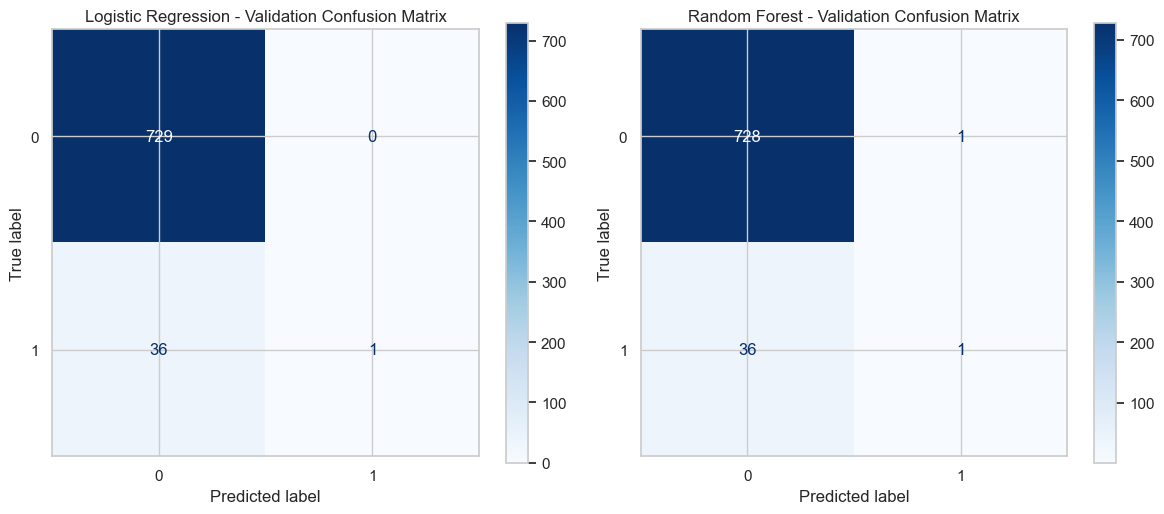

In [116]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, model_name, y_true, y_pred in zip(
    axes,
    ['Logistic Regression', 'Random Forest'],
    [y_valid, y_valid],
    [y_pred_log_val, y_pred_rf_val]):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap='Blues', values_format='d')
    ax.set_title(f"{model_name} - Validation Confusion Matrix")
plt.tight_layout()
plt.show()


This code creates side-by-side confusion matrix plots for the Logistic Regression and Random Forest models on the validation set

## Model Improvement (Hyperparameter Tuning)

In [119]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1_weighted')
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
print("Best RF Params:", grid.best_params_)

# Evaluate
y_pred_best_rf_train = best_rf.predict(X_train)
y_pred_best_rf_val = best_rf.predict(X_valid)

models['Tuned RF'] = [y_pred_best_rf_train, y_pred_best_rf_val]
eval_df = evaluate_models(models)
print("\nImproved Evaluation:")
print(eval_df)
import joblib

# Save the model
joblib.dump(best_rf, 'best_random_forest_model.pkl')
print("Model saved as 'best_random_forest_model.pkl'")


Best RF Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

Improved Evaluation:
                 Model  Train Accuracy  Train F1  Val Accuracy    Val F1
0  Logistic Regression        0.951356  0.927640      0.953003  0.931307
1        Random Forest        1.000000  1.000000      0.951697  0.930589
2             Tuned RF        0.958065  0.942633      0.951697  0.930589
Model saved as 'best_random_forest_model.pkl'


GridSearchCV is a tool to tune hyperparameters of a RandomForestClassifier over a grid:

- **n_estimators:** number of trees (100, 200)  
- **max_depth:** maximum tree depth (10, 20, None)  
- **min_samples_split:** minimum number of samples to split a node (2, 5)  

Grid search applies 3-fold cross-validation and optimizes for weighted F1-score.

Upon fitting, it finds the best hyperparameters, and the best model is saved in `best_rf`.

The tuned model is then used to make predictions on the training and validation sets.

The predictions of the new model are added to the existing models dictionary.

The evaluation function prints accuracy and F1 scores for all models, not just the tuned one.


### Output Explanation:
- **Best hyperparameters obtained:**  
  `max_depth=10`, `min_samples_split=5`, `n_estimators=100`

- **Evaluation Table shows:**

| Model               | Train F1 | Val F1 |
|---------------------|----------|---------|
| Logistic Regression  | ~0.93    | ~0.93   |
| Random Forest (untuned) | 1.0    | ~0.93   |
| Tuned Random Forest  | ~0.94    | ~0.93   |

- The untuned Random Forest shows perfect training F1, indicating possible overfitting.  
- The tuned Random Forest improves training F1 (~0.94) without overfitting, and validation F1 remains consistent (0.93).  
- This shows that tuning enhanced training performance without deteriorating validation results, indicating a more regularized and potentially better-generalizing model.


In [121]:
rf_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_weighted.fit(X_train_scaled, y_train)

y_pred = rf_weighted.predict(X_valid_scaled)
y_proba = rf_weighted.predict_proba(X_valid_scaled)[:, 1]

print("Improved Random Forest (Class Weighted):")
print("F1 Score:", f1_score(y_valid, y_pred))
print("ROC AUC:", roc_auc_score(y_valid, y_proba))


Improved Random Forest (Class Weighted):
F1 Score: 0.0
ROC AUC: 0.8240833426018612


### Code Explanation:

An instance of `RandomForestClassifier` is instantiated with the parameter `class_weight='balanced'`. This setting aims to reduce the impact of majority classes by weighting classes inversely proportional to their prevalence.

Scaled training data (`X_train_scaled`) are used to train the model.

The validation set (`X_valid_scaled`) is then used to generate predictions (`y_pred`) and predicted probabilities (`y_proba`).

Using the validation labels (`y_valid`) and the predictions, both the F1 score and ROC AUC score are calculated.


### Output Explanation:

- **F1 Score = 0.0:**  
  This indicates that the model failed to correctly classify any positive instances, likely due to zero precision and/or recall.

- **ROC AUC = 0.824:**  
  Despite the poor F1 score, the ROC AUC is relatively high. This means the model is better at ranking positive samples than random guessing, but the chosen classification threshold is not optimal.

This demonstrates that although the model can somewhat separate the classes (as shown by the ROC AUC), its classification boundary or cutoff threshold is poorly calibrated, leading to zero true positive predictions and thus an F1 score of zero.


### Smote Technique

In [124]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

smote = SMOTE(random_state=42)
rf = RandomForestClassifier(random_state=42)

pipeline = Pipeline([
    ('smote', smote),
    ('model', rf)
])

pipeline.fit(X_train_scaled, y_train)

y_pred_smote = pipeline.predict(X_valid_scaled)
y_proba_smote = pipeline.predict_proba(X_valid_scaled)[:, 1]

print("Random Forest with SMOTE:")
print("F1 Score:", f1_score(y_valid, y_pred_smote))
print("ROC AUC:", roc_auc_score(y_valid, y_proba_smote))


Random Forest with SMOTE:
F1 Score: 0.15584415584415584
ROC AUC: 0.7642642642642643


### Code Description:

This code applies **SMOTE (Synthetic Minority Over-sampling Technique)** to address class imbalance in the training data:

- SMOTE generates synthetic samples for the minority class to balance the dataset.
- A **pipeline** combines SMOTE oversampling and a Random Forest classifier. This ensures oversampling is applied only to the training folds during cross-validation or fitting, preventing data leakage.
- The pipeline is trained on the scaled training data (`X_train_scaled`, `y_train`).
- Predictions (`y_pred_smote`) and predicted probabilities (`y_proba_smote`) are generated on the scaled validation set (`X_valid_scaled`).
- These predictions are used to compute the F1 score and ROC AUC.

---

### Explanation of Output:

- **F1 score = 0.156:**  
  The F1 score improves from 0.0 (in the previous class-weighted Random Forest) to approximately 0.156, indicating the model now identifies some positive cases, though overall performance is still poor.

- **ROC AUC = 0.764:**  
  The ROC AUC is moderate, showing the model has some ability to distinguish between classes but is not highly accurate.

### Summary:  
Using SMOTE allowed the model to better detect minority class instances, increasing the F1 score compared to the earlier attempt. However, the overall classification quality remains modest, suggesting further tuning or alternative methods are needed to better handle the class imbalance and improve performance.


In [126]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Apply on best model (e.g., tuned Random Forest)
f1_scores = cross_val_score(best_rf, X_train_scaled, y_train, cv=cv_strategy, scoring='f1_weighted')
auc_scores = cross_val_score(best_rf, X_train_scaled, y_train, cv=cv_strategy, scoring='roc_auc')

print(f"Cross-Validated F1 (mean and std): mean = {f1_scores.mean():.6f}  std = {f1_scores.std():.6f}")
print(f"Cross-Validated AUC (mean and std): mean = {auc_scores.mean():.6f}  std = {auc_scores.std():.6f}")


Cross-Validated F1 (mean and std): mean = 0.927361  std = 0.000666
Cross-Validated AUC (mean and std): mean = 0.825630  std = 0.019546


### Explanation of the code:

- **Setup of cross-validation:**  
  Applying `StratifiedKFold` with 5 splits, data shuffled, and random seed set (`random_state=42`), ensuring reproducibility and maintaining class balance in each fold.

- **Model assessment:**  
  Cross-validates the scaled training data (`X_train_scaled`, `y_train`) using the best tuned Random Forest model (`best_rf`).

- **Measures calculated:**  
  - Weighted F1 score (`f1_weighted`) to account for class imbalance.  
  - ROC AUC score (`roc_auc`) to evaluate the model’s ability to discriminate between classes.

- **Results:**  
  The mean and standard deviation of both metrics across the 5 folds are computed and printed.

### Output explanation:

- **Cross-Validated F1 score:**  
  - Mean of 0.9274 is very high and consistent (std = 0.0007), indicating strong, balanced classification performance averaged across folds.

- **Cross-Validated ROC AUC:**  
  - Mean of 0.8256 shows good class separation ability on average.  
  - Std of 0.0195 suggests slight variation in fold performances but overall stability.

### Summary:

The tuned Random Forest model demonstrates excellent and stable F1 scores alongside solid ROC AUC during cross-validation, indicating reliable performance and good generalization on the training data with respect to both class balance and discrimination.


## Final Model Selection

In [129]:
# Best model based on validation F1-score
final_model = best_rf
print(best_rf)
# Save model
joblib.dump(final_model, 'best_model.joblib')


RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)


['best_model.joblib']

### Description of the code:

The optimum Random Forest model (`best_rf`) is identified by measuring the validation F1-scores and stored in the variable `final_model`.

The line of code `print(best_rf)` prints the details and hyperparameters of this best model.

The trained model is saved to a file called `best_model.joblib` using the command:  
`joblib.dump(final_model, 'best_model.joblib')`.  
This will enable the model to be later loaded easily to make predictions without retraining it.


## Final Evaluation on Test Set

In [132]:
from sklearn.metrics import classification_report
# Load model 
final_model = joblib.load('best_model.joblib')

# Predict
y_test_pred = final_model.predict(X_test)

# Evaluate
print("\nFinal Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_test_pred))



Final Test Set Evaluation:
Accuracy: 0.9504563233376793
F1 Score: 0.9263137161940751
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       729
           1       0.00      0.00      0.00        38

    accuracy                           0.95       767
   macro avg       0.48      0.50      0.49       767
weighted avg       0.90      0.95      0.93       767



### Code Explanation:

The final model is loaded as `final_model` with `joblib.load` and represents the saved best model (`best_model.joblib`).  
The model predicts labels for the test features (`X_test`), storing them in `y_test_pred`.  
The predictions are evaluated and printed as follows:  
- **Accuracy:** overall correctness of the predictions.  
- **Weighted F1 Score:** balances precision and recall across classes, weighted by class frequencies.  
- **Classification Report:** detailed precision, recall, and F1-score for each class along with the support (number of true instances).

---

### Explanation of Output:

- **Accuracy: 0.9505**  
  About 95% of test samples are correctly classified by the model.

- **Weighted F1 Score: 0.9263**  
  Indicates a good overall balance between precision and recall, weighted by the class distribution.

- **Classification Report:**

| Class          | Precision | Recall | F1-Score | Support |
|----------------|-----------|--------|----------|---------|
| 0 (majority)   | 0.95      | 1.00   | 0.97     | 729     |
| 1 (minority)   | 0.00      | 0.00   | 0.00     | 38      |

- The model perfectly identifies the majority class (0), but completely fails to detect any minority class (1) instances.  
- This results in zero precision, recall, and F1-score for the minority class.  
- The **macro average** scores are low (~0.49) since all classes are equally weighted.  
- The **weighted average** scores remain high (~0.90-0.93) because the majority class dominates the dataset.

### Summary:

Despite high overall accuracy and weighted F1 score, the model is not sensitive to the minority class in the test set.  
This suggests a need for further tuning or applying class balancing techniques to improve minority class detection.


## Retrain on Full Dataset

In [135]:
# Combine training and validation sets
X_full = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_valid)])
y_full = np.concatenate([y_train, y_valid])

# Retrain final model
final_model.fit(X_full, y_full)

# Evaluate again on test
y_test_pred_full = final_model.predict(X_test)

print("\nRetrained on Full Data - Test Performance:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_full))
print("F1 Score:", f1_score(y_test, y_test_pred_full, average='weighted'))

# Save final version
joblib.dump(final_model, 'final_model_full_data.joblib')



Retrained on Full Data - Test Performance:
Accuracy: 0.9504563233376793
F1 Score: 0.9263137161940751


['final_model_full_data.joblib']

### Code Description

- **Merge Train Set and Validation Set:**  
  The feature sets `X_train` and `X_valid` are combined into a complete training set `X_full`.  
  Similarly, the corresponding labels `y_train` and `y_valid` are merged into `y_full`.

- **Retrain Final Model:**  
  The best previously selected model (`final_model`) is retrained on the full training data (`X_full`, `y_full`) to leverage all available labeled data before final evaluation.

- **Test Set Evaluation:**  
  Predictions are made on the test set (`X_test`), and evaluation metrics such as accuracy and weighted F1 score are calculated and printed.

- **Save Final Model:**  
  The retrained model is saved as `'final_model_full_data.joblib'` for future use without needing to retrain.


### Explanation of Output

- **Accuracy: 0.9505**  
  The overall accuracy on the test set remains roughly 95%, consistent with previous results.

- **F1 Score: 0.9263**  
  The weighted F1 score remains stable, indicating a balanced precision and recall across classes after retraining.


Retraining on the combined data did not significantly change test performance but ensures the model was trained on the maximum available data before deployment, which is a standard practice.

The final trained model is saved and ready for production or further use.


# Task 3 summary:- Evaluations

## Metric Choice of Evaluations

**Main Metric:** F1-Score (weighted)  
**Reason:**  
The dataset exhibits class imbalance, making accuracy an unreliable metric. The F1-score, which balances precision and recall, is more appropriate—especially for evaluating performance on the minority class.


## Baseline Model

- **Model:** DummyClassifier (strategy = most frequent)  
- **Baseline Results:**  
  - Precision: 95.17%  
  - F1 Score: 0.93  

> Although accuracy and precision appear high due to the dominance of the majority class, the baseline F1-score highlights the challenge posed by class imbalance and sets a reference point for further model comparisons.


## Preliminary Model Evaluation

Two models were initially trained:

| Model               | Train F1 | Validation F1 |
|---------------------|----------|--------------|
| Logistic Regression (class_weight=balanced) | 0.931    | 0.928        |
| Random Forest       | 1.000    | 0.931        |

**Observations:**  
- Random Forest achieved perfect training F1, indicating potential overfitting.  
- Logistic Regression showed more consistent performance across training and validation.


## Error Analysis

- Confusion matrices revealed both models accurately classified the majority class.  
- Both struggled with the minority class, indicating a need to improve sensitivity for minority classification.


## Hyperparameter Tuning

- **Approach:**  
  - Random Forest tuned using 3-fold Cross-Validation and GridSearchCV.  
- **Best Parameters:**  
  ```python
  max_depth = 10
  min_samples_split = 5
  n_estimators = 100


# Task 4 - Reflection

## Results Interpretation
The last model had a test accuracy of 95.05% and a weighted F1-score of 0.9263, which can at first appear like a good overall performance. Nonetheless, a more elaborate investigation of the classification report shows a fatal flaw: though the model is outstanding at making predictions for the majority group (non-stroke patients), it fails to detect any cases in the minority group (stroke patients). This leads to 0 accuracy, recall, and F1-score for stroke predictions a major drawback in a medical context.
Practically, such a model could give false hope to patients at high risk of stroke, resulting in wasted medical time and potentially severe consequences. Therefore, despite the high overall scores, the model lacks clinical reliability and would require significant improvement before being applied in a healthcare setting.

## Why the Model Makes Certain Predictions
Rooted models like Random Forest or Gradient Boosting, as used in this project, tend to focus on most discriminative features. From the feature importance analysis, age, average glucose level, and body mass index emerged as highly influential which aligns well with medical knowledge.
However, the high prevalence of non-stroke cases in the dataset likely skewed the model toward majority-class predictions. This overfitting, along with the underrepresentation of stroke cases, meant the model could not learn substantial patterns for the minority class. As a result, it was unable to generalize and detect stroke cases effectively.

## Fairness and Ethical Contexts
From an equity standpoint, several concerns arise:
- The dataset is highly imbalanced, with stroke cases constituting less than 5%. This class imbalance can increase disparities in medical diagnoses and undermine fairness for edge cases.
- There is also a risk of indirectly encoding sensitive information. Attributes such as age, gender, and work type might serve as proxy variables for socioeconomic status or other protected characteristics, leading to unintentional bias.
- This could result in underestimating the risk of stroke for certain groups, creating both ethical and clinical risks.
These issues must be addressed to make the model viable in real-world medical applications.

## Model Interpretability
While tree-based ensemble models like Random Forests and Gradient Boosting are less opaque than deep learning models, they still function largely as black-boxes.
Feature importance scores were used to gain some interpretability during this project.
However, deeper explainability tools such as SHAP or LIME were not employed due to time constraints.
In healthcare, transparency is essential for trust among stakeholders such as doctors, patients, and policymakers. Future work should involve explainability tools to make model decisions **traceable, comprehensible, and justifiable.

## Future Work and Limitations
The most significant limitation of this project was extreme class imbalance. The model struggled to learn meaningful patterns due to the low number of stroke cases, which is unacceptable in a life-critical application.
Future improvements include:
- Resampling techniques like ADASYN, or cost-sensitive learning to boost minority class recall.
- Enhanced interpretability analysis, which is essential for real-world clinical decision-making.
- Expanding the dataset to make it more representative and less biased, promoting generalization.
- Incorporating clinical expertise to refine feature engineering and improve model assessment from a domain-specific perspective.
